In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# Load Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Base.csv')

Saving Base.csv to Base.csv


In [ ]:
print(df.head())

   fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711           AA          1059  ..

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

# Check for Missing Values

In [ ]:
print(df.isna().sum())

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

# Check for Duplicate Rows

In [ ]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


# Univariate Analysis

## fraud_bool

In [ ]:
# Fraud label (1 if fraud, 0 if legit)
df['fraud_bool'].value_counts()

,count
fraud_bool,
0,988971
1,11029


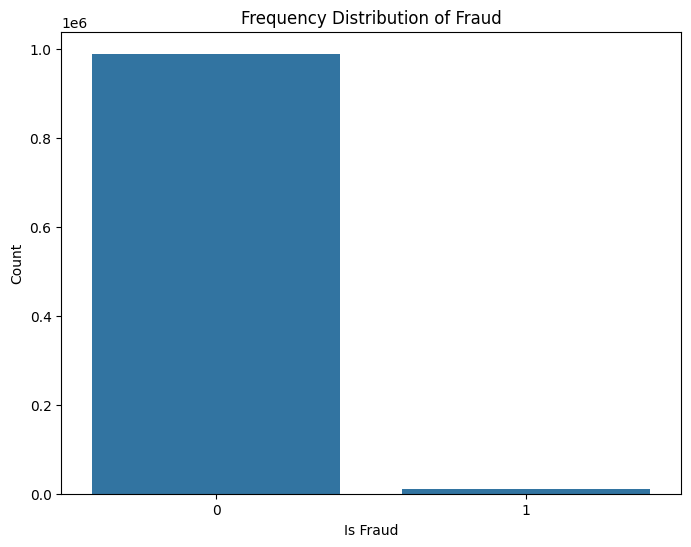

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='fraud_bool')
plt.title("Frequency Distribution of Fraud")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

## income

In [ ]:
# Annual income of the applicant in quantiles. Ranges between [0, 1].
df['income'].describe()

,income
count,1000000.000000
mean,0.562696
std,0.290343
min,0.100000
25%,0.300000
50%,0.600000
75%,0.800000
max,0.900000


In [ ]:
df['income'].value_counts()

,count
income,
0.9,221419
0.1,157449
0.8,146650
0.6,111973
0.7,105109
0.4,81364
0.2,69345
0.5,55858
0.3,50833


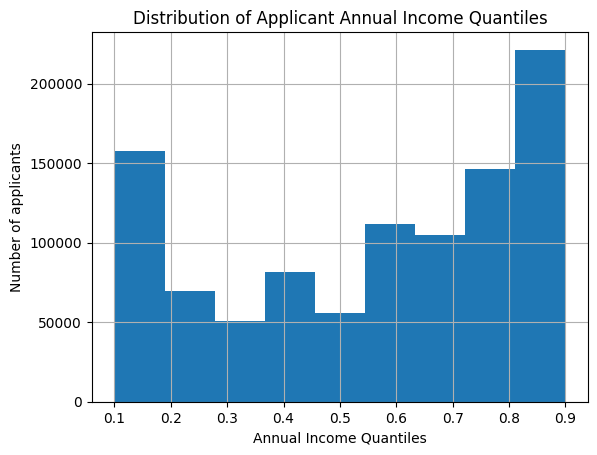

In [ ]:
df['income'].hist(bins=9)
plt.xlabel('Annual Income Quantiles')
plt.ylabel('Number of applicants')
plt.title('Distribution of Applicant Annual Income Quantiles')
plt.show()

## name_email_similarity

In [ ]:
# Metric of similarity between email and applicant’s name. Higher values represent higher similarity. Ranges between [0, 1].
df['name_email_similarity'].describe()

,name_email_similarity
count,1000000.000000
mean,0.493694
std,0.289125
min,0.000001
25%,0.225216
50%,0.492153
75%,0.755567
max,0.999999


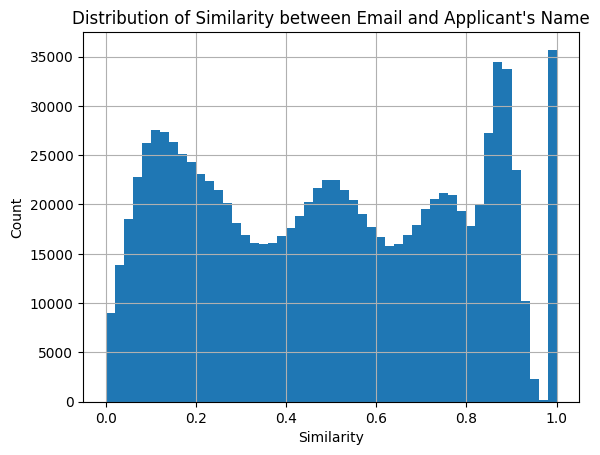

In [ ]:
df['name_email_similarity'].hist(bins=50)
plt.xlabel('Similarity')
plt.ylabel('Count')
plt.title('Distribution of Similarity between Email and Applicant\'s Name')
plt.show()

## prev_address_months_count

In [ ]:
# Number of months in previous registered address of the applicant,
# i.e. the applicant’s previous residence, if applicable. Ranges between [−1, 380] months (-1 is a missing value).
df['prev_address_months_count'].describe()

,prev_address_months_count
count,1000000.000000
mean,16.718568
std,44.046230
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,12.000000
max,383.000000


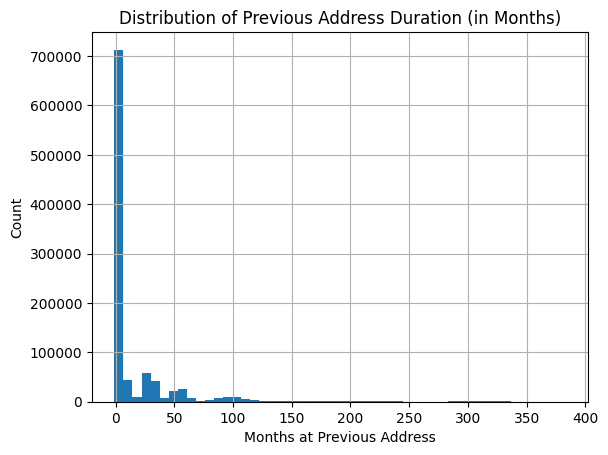

In [ ]:
df['prev_address_months_count'].hist(bins=50)
plt.xlabel('Months at Previous Address')
plt.ylabel('Count')
plt.title('Distribution of Previous Address Duration (in Months)')
plt.show()

## current_address_months_count

In [ ]:
# Months in currently registered address of the applicant. Ranges between [−1, 406] months (-1 is a missing value).
df['current_address_months_count'].describe()

,current_address_months_count
count,1000000.000000
mean,86.587867
std,88.406599
min,-1.000000
25%,19.000000
50%,52.000000
75%,130.000000
max,428.000000


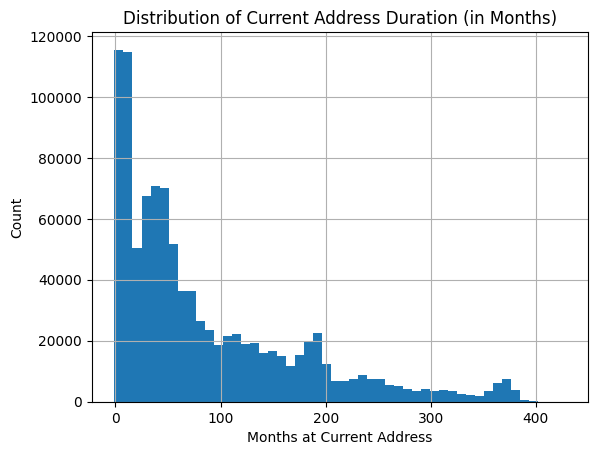

In [ ]:
df['current_address_months_count'].hist(bins=50)
plt.xlabel('Months at Current Address')
plt.ylabel('Count')
plt.title('Distribution of Current Address Duration (in Months)')
plt.show()

## customer_age

In [ ]:
# Applicant’s age in bins per decade (e.g, 20-29 is represented as 20).
df['customer_age'].describe()

,customer_age
count,1000000.000000
mean,33.689080
std,12.025799
min,10.000000
25%,20.000000
50%,30.000000
75%,40.000000
max,90.000000


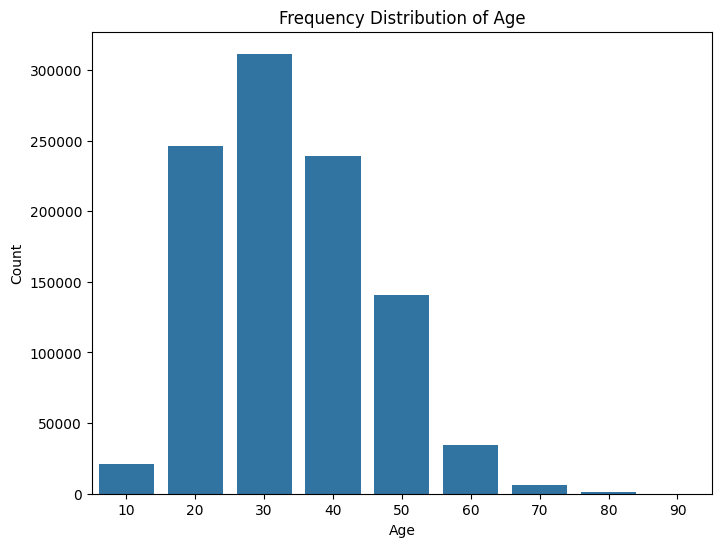

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='customer_age')
plt.title("Frequency Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## days_since_request

In [ ]:
# Number of days passed since application was done. Ranges between [0, 78] days.
df['days_since_request'].describe()

,days_since_request
count,1.000000e+06
mean,1.025705e+00
std,5.381835e+00
min,4.036860e-09
25%,7.193246e-03
50%,1.517574e-02
75%,2.633069e-02
max,7.845690e+01


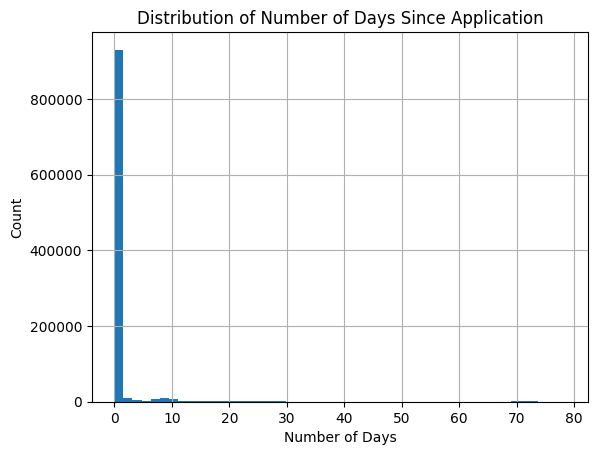

In [ ]:
df['days_since_request'].hist(bins=50)
plt.xlabel('Number of Days')
plt.ylabel('Count')
plt.title('Distribution of Number of Days Since Application')
plt.show()

## intended_balcon_amount

In [ ]:
# Initial transferred amount for application. Ranges between [−1, 108].
df['intended_balcon_amount'].describe()

,intended_balcon_amount
count,1000000.000000
mean,8.661499
std,20.236155
min,-15.530555
25%,-1.181488
50%,-0.830507
75%,4.984176
max,112.956928


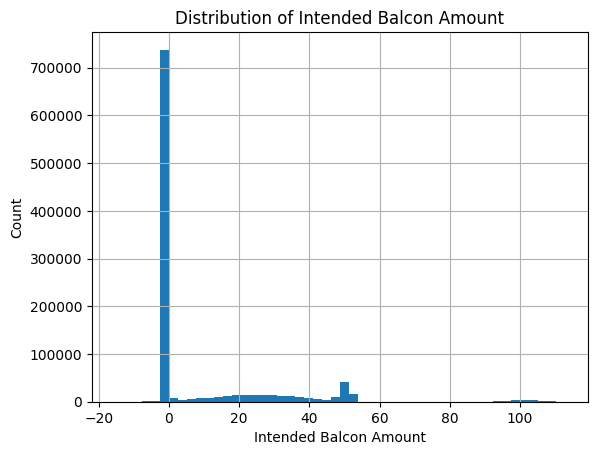

In [ ]:
df['intended_balcon_amount'].hist(bins=50)
plt.xlabel('Intended Balcon Amount')
plt.ylabel('Count')
plt.title('Distribution of Intended Balcon Amount')
plt.show()

## payment_type

In [ ]:
# Credit payment plan type. 5 possible (annonymized) values.
df['payment_type'].describe()

,payment_type
count,1000000
unique,5
top,AB
freq,370554


In [ ]:
df['payment_type'].value_counts()

,count
payment_type,
AB,370554
AA,258249
AC,252071
AD,118837
AE,289


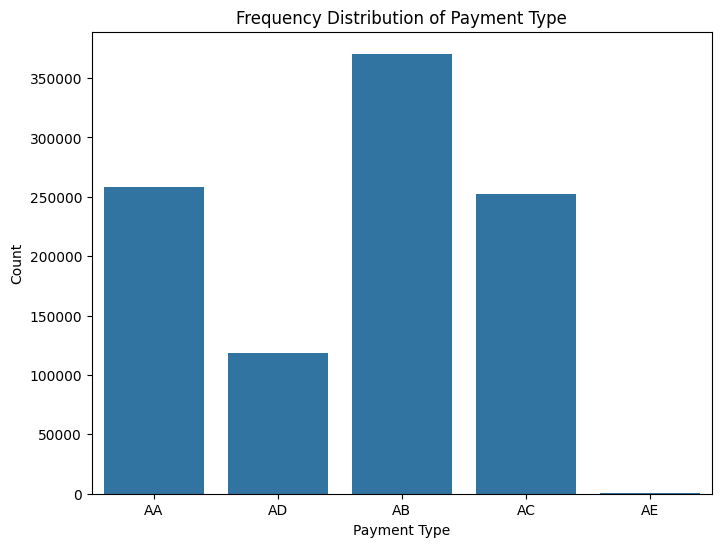

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='payment_type')
plt.title("Frequency Distribution of Payment Type")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

## zip_count_4w

In [ ]:
# Number of applications within same zip code in last 4 weeks. Ranges between [1, 5767].
df['zip_count_4w'].describe()

,zip_count_4w
count,1000000.000000
mean,1572.692049
std,1005.374565
min,1.000000
25%,894.000000
50%,1263.000000
75%,1944.000000
max,6700.000000


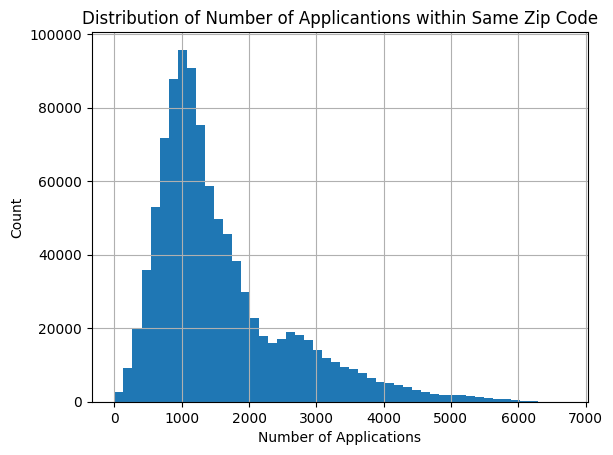

In [ ]:
df['zip_count_4w'].hist(bins=50)
plt.xlabel('Number of Applications')
plt.ylabel('Count')
plt.title('Distribution of Number of Applicantions within Same Zip Code')
plt.show()

## velocity_6h

In [ ]:
# Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. Ranges between [−211, 24763].
df['velocity_6h'].describe()

,velocity_6h
count,1000000.000000
mean,5665.296605
std,3009.380665
min,-170.603072
25%,3436.365848
50%,5319.769349
75%,7680.717827
max,16715.565404


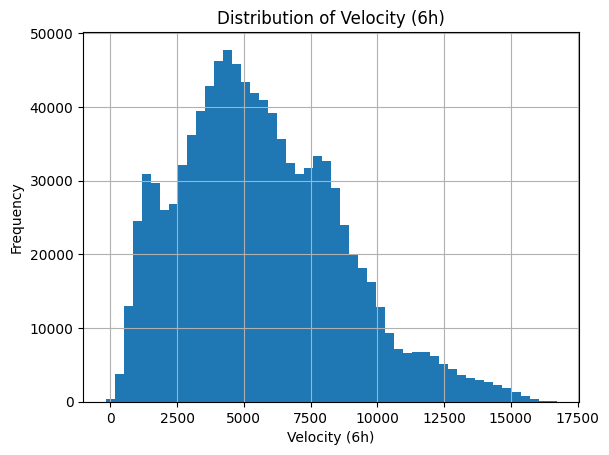

In [ ]:
df['velocity_6h'].hist(bins=50)
plt.xlabel('Velocity (6h)')
plt.ylabel('Frequency')
plt.title('Distribution of Velocity (6h)')
plt.show()

## velocity_24h

In [ ]:
# Velocity of total applications made in last 24 hours
# i.e., average number of applications per hour in the last 24 hours
df['velocity_24h'].describe()

,velocity_24h
count,1000000.000000
mean,4769.781965
std,1479.212612
min,1300.307314
25%,3593.179135
50%,4749.921161
75%,5752.574191
max,9506.896596


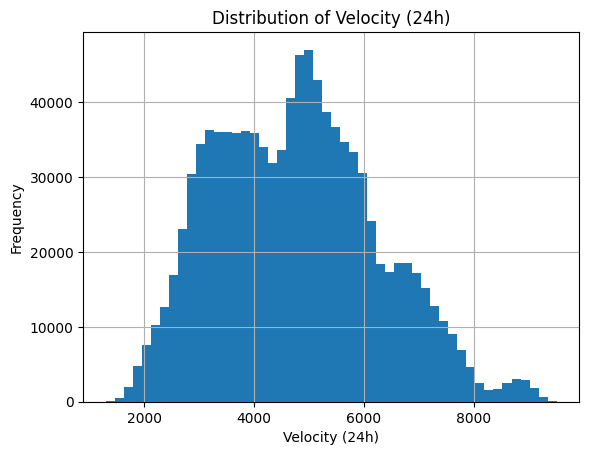

In [ ]:
df['velocity_24h'] = pd.to_numeric(df['velocity_24h'], errors='coerce') # initally type was object
df['velocity_24h'].hist(bins=50)
plt.xlabel('Velocity (24h)')
plt.ylabel('Frequency')
plt.title('Distribution of Velocity (24h)')
plt.show()

## velocity_4w

In [ ]:
# Velocity of total applications made in last 4 weeks,
# i.e., average number of applications per hour in the last 4 weeks
df['velocity_4w'].describe()

,velocity_4w
count,1000000.000000
mean,4856.324016
std,919.843934
min,2825.748405
25%,4268.368423
50%,4913.436941
75%,5488.083356
max,6994.764201


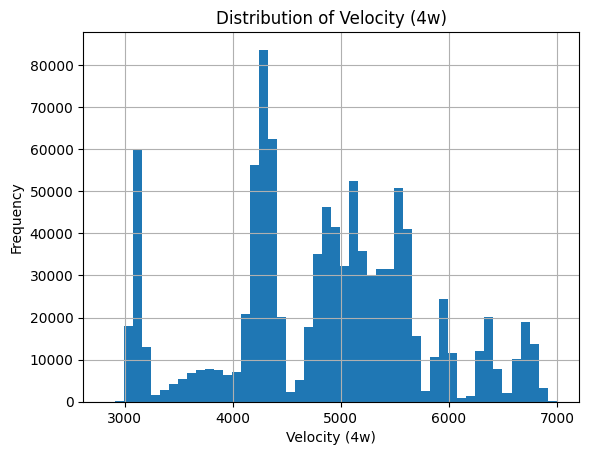

In [ ]:
df['velocity_4w'].hist(bins=50)
plt.xlabel('Velocity (4w)')
plt.ylabel('Frequency')
plt.title('Distribution of Velocity (4w)')
plt.show()


## bank_branch_count_8w

In [ ]:
# Number of total applications in the selected bank branch in last 8 weeks. Ranges between [0, 2521].
df['bank_branch_count_8w'].describe()

,bank_branch_count_8w
count,1000000.000000
mean,184.361849
std,459.625329
min,0.000000
25%,1.000000
50%,9.000000
75%,25.000000
max,2385.000000


<Axes: >

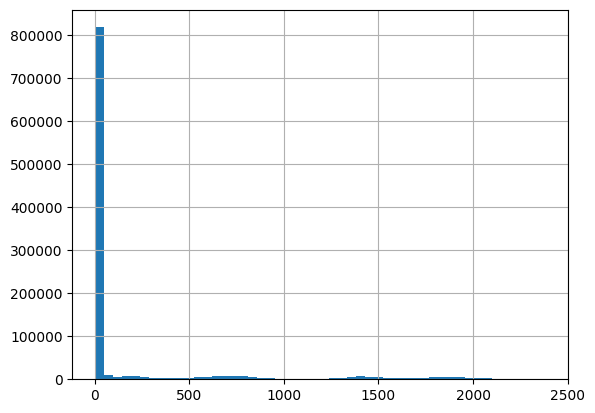

In [ ]:
df['bank_branch_count_8w'].hist(bins=50)

## date_of_birth_distinct_emails_4w

In [ ]:
# Number of emails for applicants with same date of birth in last 4 weeks. Ranges between [0, 42].
df['date_of_birth_distinct_emails_4w'].describe()

,date_of_birth_distinct_emails_4w
count,1000000.000000
mean,9.503544
std,5.033792
min,0.000000
25%,6.000000
50%,9.000000
75%,13.000000
max,39.000000


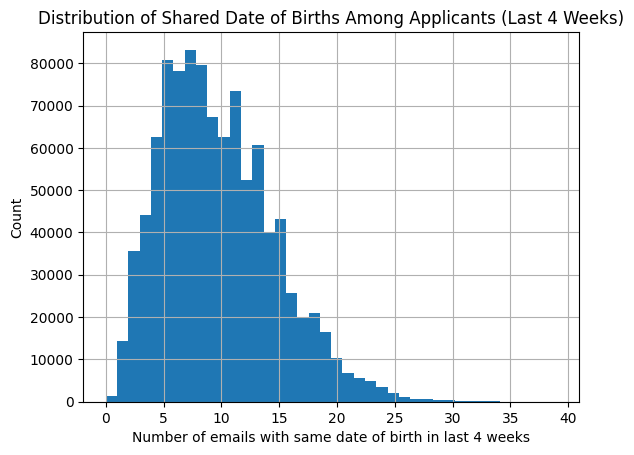

In [ ]:
df['date_of_birth_distinct_emails_4w'].hist(bins=40)

plt.xlabel('Number of emails with same date of birth in last 4 weeks')
plt.ylabel('Count')
plt.title('Distribution of Shared Date of Births Among Applicants (Last 4 Weeks)')
plt.show()

## employment_status

In [ ]:
# Employment status of the applicant. 7 possible (annonymized) values.
df['employment_status'].describe()

,employment_status
count,1000000
unique,7
top,CA
freq,730252


In [ ]:
df['employment_status'].value_counts()

,count
employment_status,
CA,730252
CB,138288
CF,44034
CC,37758
CD,26522
CE,22693
CG,453


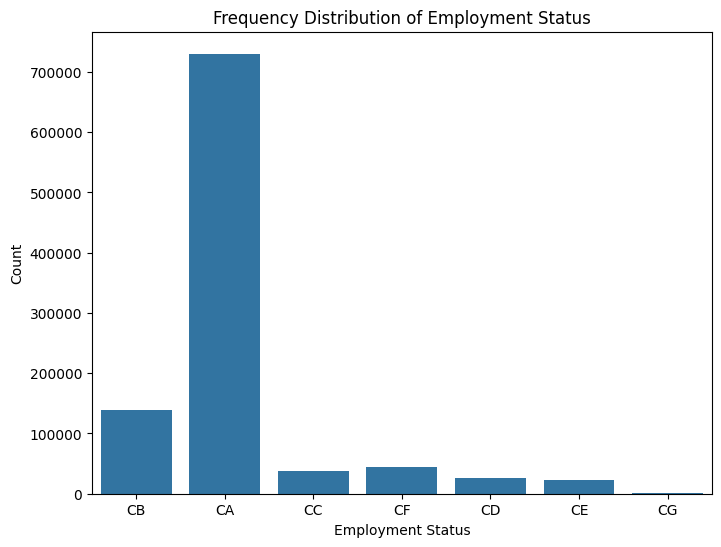

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='employment_status')
plt.title("Frequency Distribution of Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.show()

## credit_risk_score

In [ ]:
# Internal score of application risk. Ranges between [−176, 387].
df['credit_risk_score'].describe()

,credit_risk_score
count,1000000.000000
mean,130.989595
std,69.681812
min,-170.000000
25%,83.000000
50%,122.000000
75%,178.000000
max,389.000000


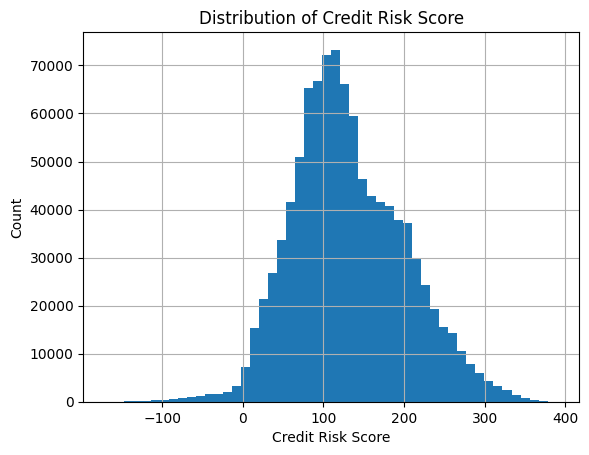

In [ ]:
df['credit_risk_score'].hist(bins=50)
plt.xlabel('Credit Risk Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Risk Score')
plt.show()

## email_is_free

In [ ]:
# Domain of application email (either free or paid).
df['email_is_free'].value_counts()

,count
email_is_free,
1,529886
0,470114


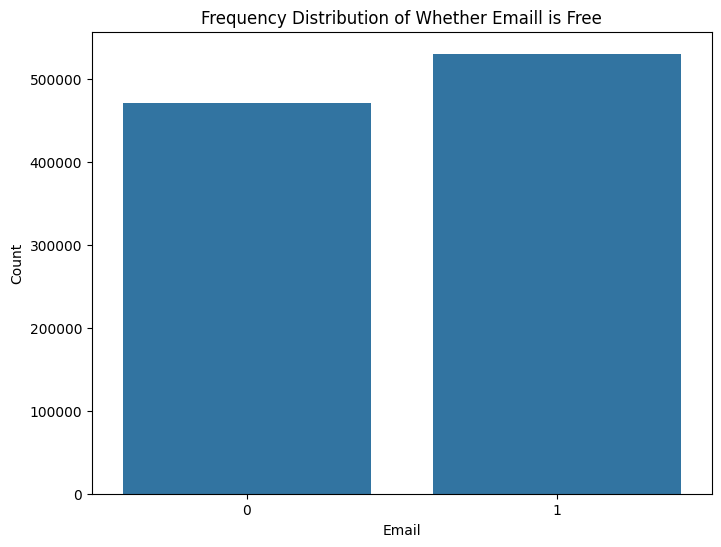

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='email_is_free')
plt.title("Frequency Distribution of Whether Emaill is Free")
plt.xlabel("Email")
plt.ylabel("Count")
plt.show()

## housing_status

In [ ]:
# Current residential status for applicant. 7 possible (annonymized) values.
df['housing_status'].describe()

,housing_status
count,1000000
unique,7
top,BC
freq,372143


In [ ]:
df['housing_status'].value_counts()

,count
housing_status,
BC,372143
BB,260965
BA,169675
BE,169135
BD,26161
BF,1669
BG,252


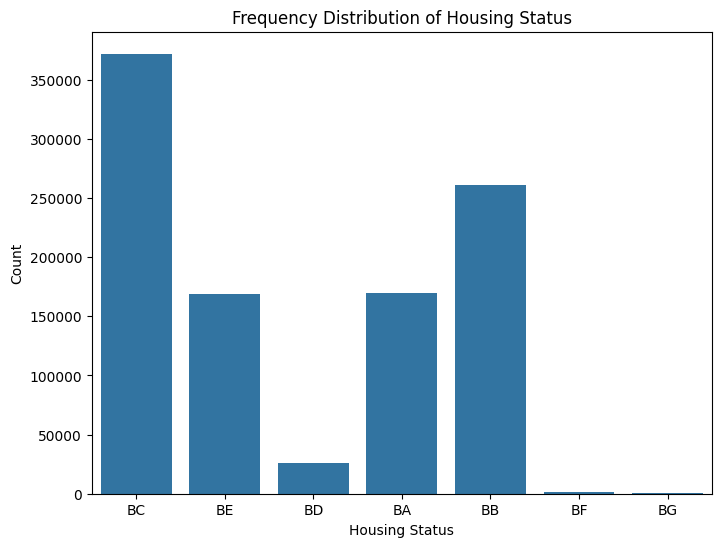

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='housing_status')
plt.title("Frequency Distribution of Housing Status")
plt.xlabel("Housing Status")
plt.ylabel("Count")
plt.show()

## phone_home_valid

In [ ]:
# Validity of provided home phone.
df['phone_home_valid'].value_counts()

,count
phone_home_valid,
0,582923
1,417077


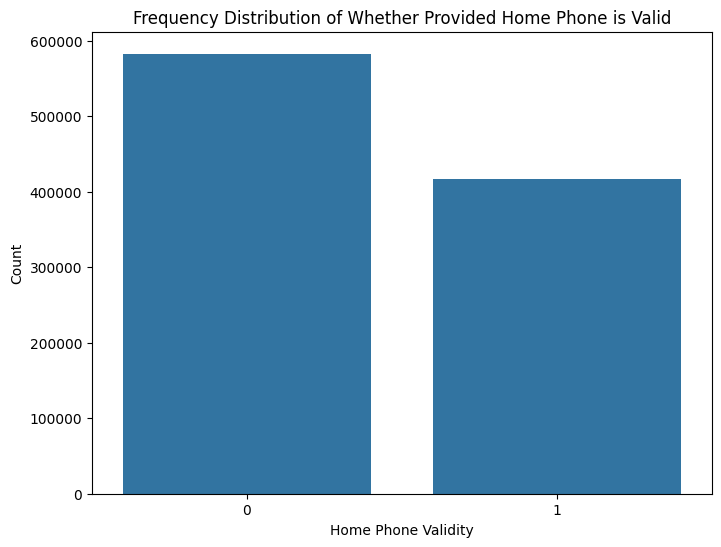

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='phone_home_valid')
plt.title("Frequency Distribution of Whether Provided Home Phone is Valid")
plt.xlabel("Home Phone Validity")
plt.ylabel("Count")
plt.show()

## phone_mobile_valid

In [ ]:
# Validity of provided mobile phone.
df['phone_mobile_valid'].value_counts()

,count
phone_mobile_valid,
1,889676
0,110324


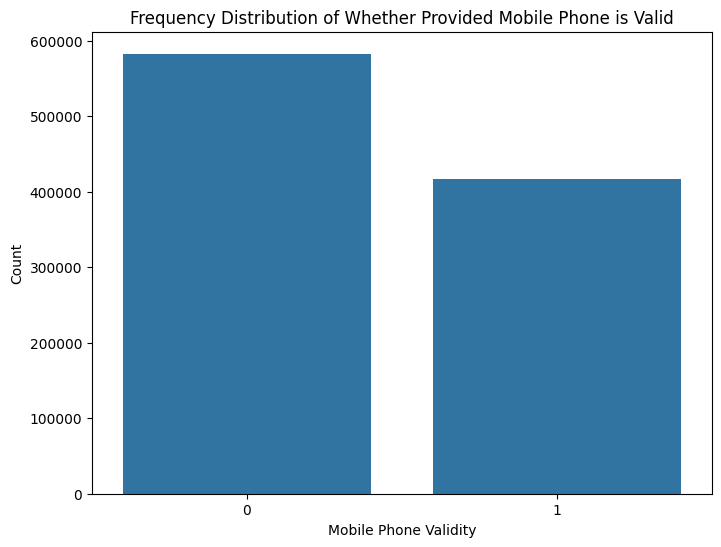

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='phone_home_valid')
plt.title("Frequency Distribution of Whether Provided Mobile Phone is Valid")
plt.xlabel("Mobile Phone Validity")
plt.ylabel("Count")
plt.show()

## bank_months_count

In [ ]:
# How old is previous account (if held) in months. Ranges between [−1, 31] months (-1 is a missing value).
df['bank_months_count'].describe()

,bank_months_count
count,1000000.000000
mean,10.839303
std,12.116875
min,-1.000000
25%,-1.000000
50%,5.000000
75%,25.000000
max,32.000000


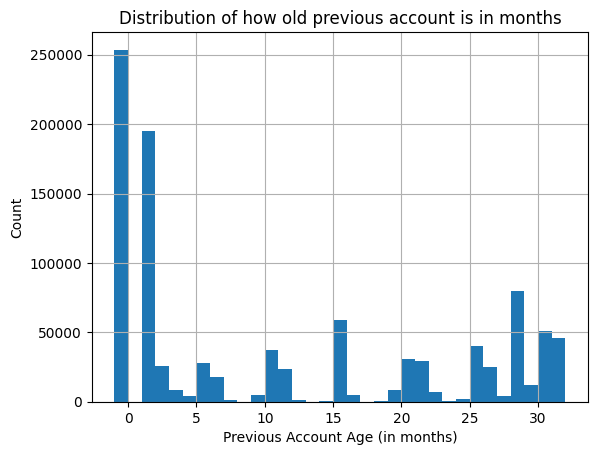

In [ ]:
df['bank_months_count'].hist(bins=33)
plt.title("Distribution of how old previous account is in months")
plt.xlabel("Previous Account Age (in months)")
plt.ylabel("Count")
plt.show()

## has_other_cards

In [ ]:
# If applicant has other cards from the same banking company.
df['has_other_cards'].value_counts()

,count
has_other_cards,
0,777012
1,222988


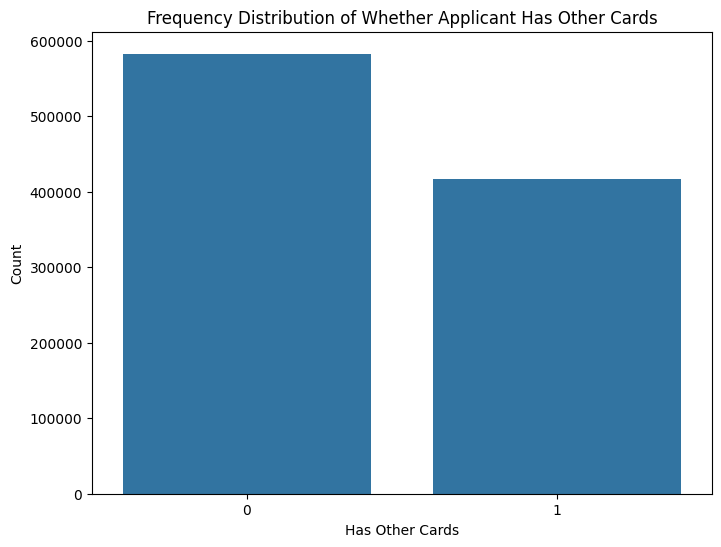

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='phone_home_valid')
plt.title("Frequency Distribution of Whether Applicant Has Other Cards")
plt.xlabel("Has Other Cards")
plt.ylabel("Count")
plt.show()

## proposed_credit_limit

In [ ]:
# Applicant’s proposed credit limit. Ranges between [200, 2000].
df['proposed_credit_limit'].describe()

,proposed_credit_limit
count,1000000.000000
mean,515.851010
std,487.559902
min,190.000000
25%,200.000000
50%,200.000000
75%,500.000000
max,2100.000000


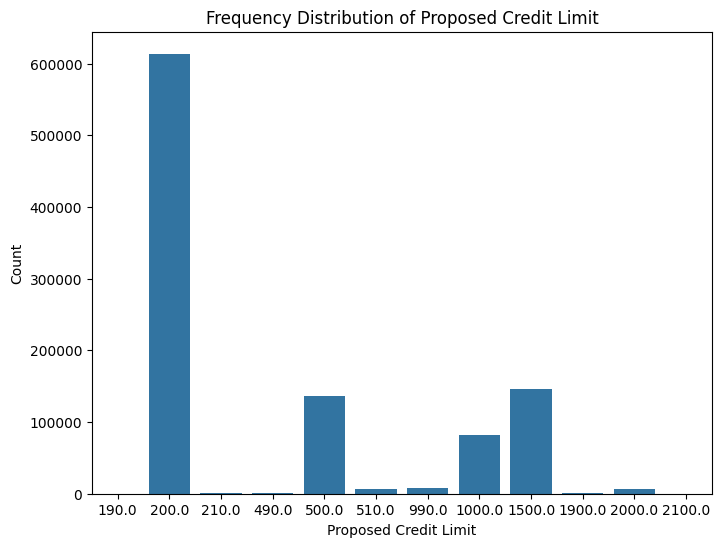

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='proposed_credit_limit')
plt.title("Frequency Distribution of Proposed Credit Limit")
plt.xlabel("Proposed Credit Limit")
plt.ylabel("Count")
plt.show()

## foreign_request

In [ ]:
# If origin country of request is different from bank’s country.
df['foreign_request'].value_counts()

,count
foreign_request,
0,974758
1,25242


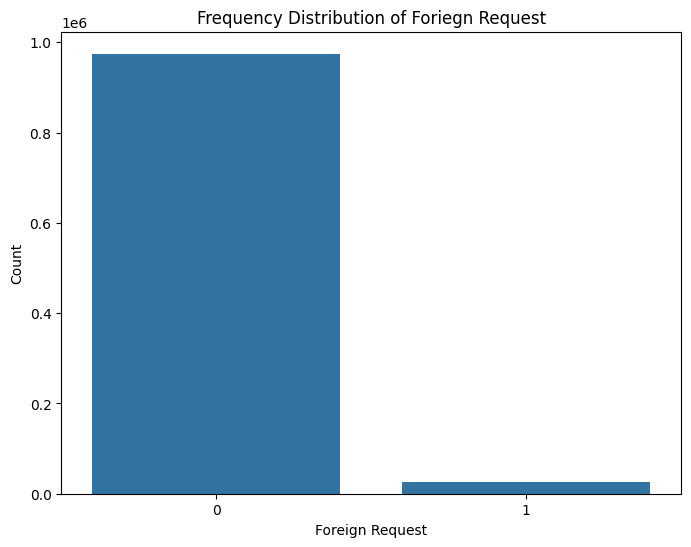

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='foreign_request')
plt.title("Frequency Distribution of Foriegn Request")
plt.xlabel("Foreign Request")
plt.ylabel("Count")
plt.show()

## source

In [ ]:
# Online source of application. Either browser(INTERNET) or mobile app (APP).
df['source'].value_counts()

,count
source,
INTERNET,992952
TELEAPP,7048


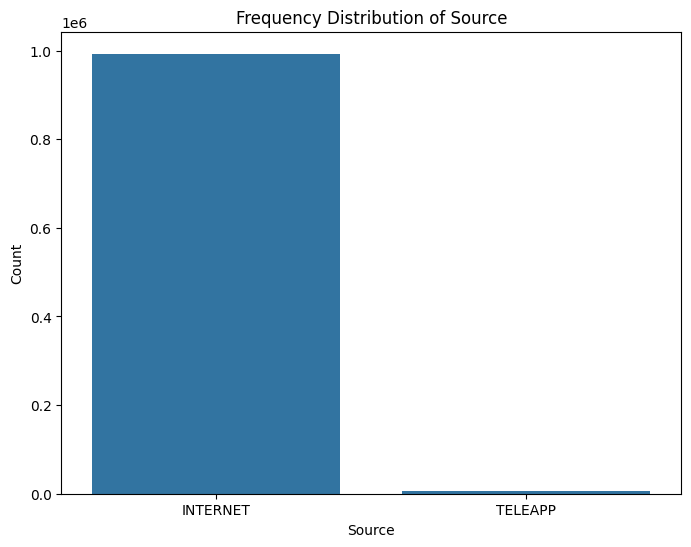

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='source')
plt.title("Frequency Distribution of Source")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

## session_length_in_minutes

In [ ]:
# Length of user session in banking website in minutes. Ranges between [−1, 107] minutes
df['session_length_in_minutes'].describe()

,session_length_in_minutes
count,1000000.000000
mean,7.544940
std,8.033106
min,-1.000000
25%,3.103053
50%,5.114321
75%,8.866131
max,85.899143


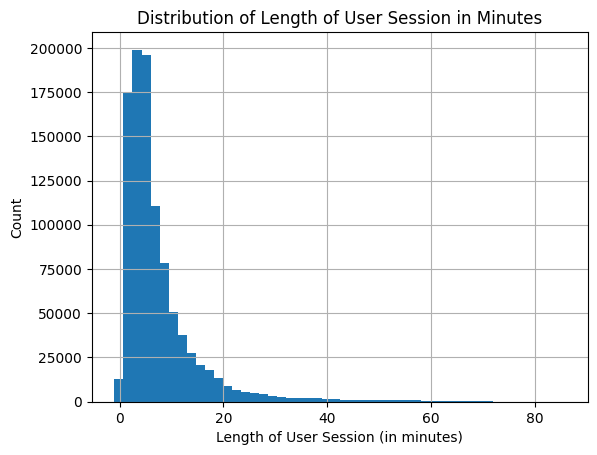

In [ ]:
df['session_length_in_minutes'].hist(bins=50)
plt.title("Distribution of Length of User Session in Minutes")
plt.xlabel("Length of User Session (in minutes)")
plt.ylabel("Count")
plt.show()

## device_os

In [ ]:
# Operative system of device that made request. Possible values are: Windows, Macintox, Linux, X11, or other.
df['device_os'].value_counts()

,count
device_os,
other,342728
linux,332712
windows,263506
macintosh,53826
x11,7228


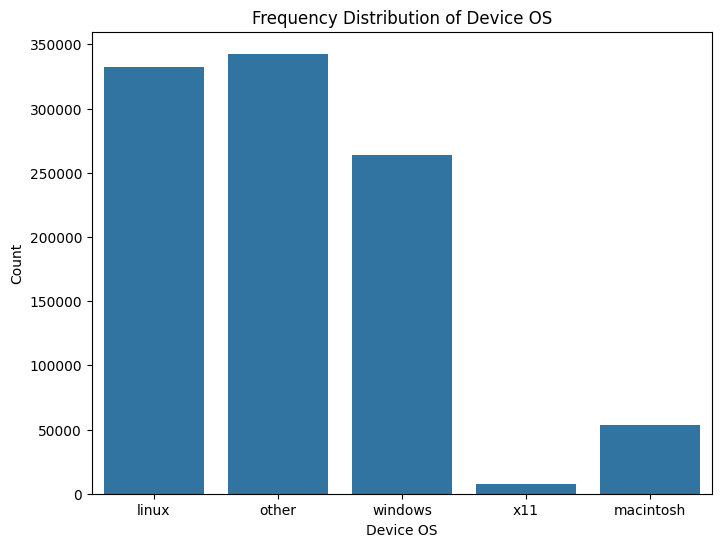

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='device_os')
plt.title("Frequency Distribution of Device OS")
plt.xlabel("Device OS")
plt.ylabel("Count")
plt.show()

## keep_alive_session

In [ ]:
# User option on session logout.
df['keep_alive_session'].value_counts()

,count
keep_alive_session,
1,576947
0,423053


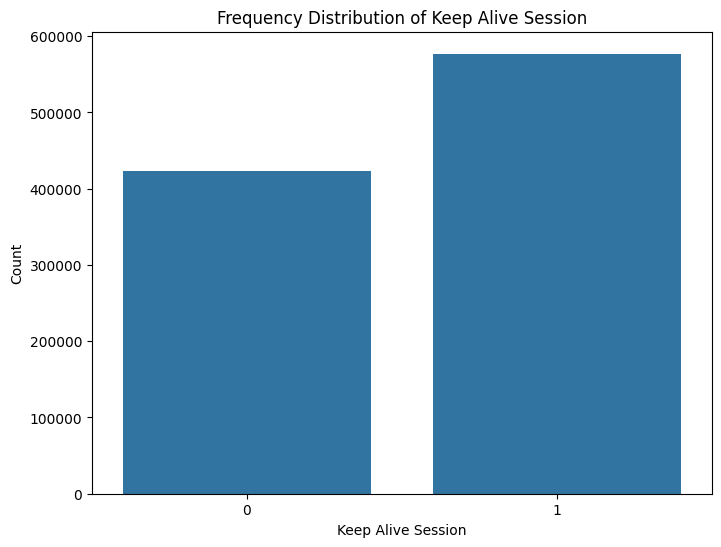

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='keep_alive_session')
plt.title("Frequency Distribution of Keep Alive Session")
plt.xlabel("Keep Alive Session")
plt.ylabel("Count")
plt.show()

## device_distinct_emails_8w

In [ ]:
# Number of distinct emails in banking website from the used device in last 8 weeks. Ranges between [0, 3].
df['device_distinct_emails_8w'].value_counts()

,count
device_distinct_emails_8w,
1,968067
2,25302
0,6272
-1,359


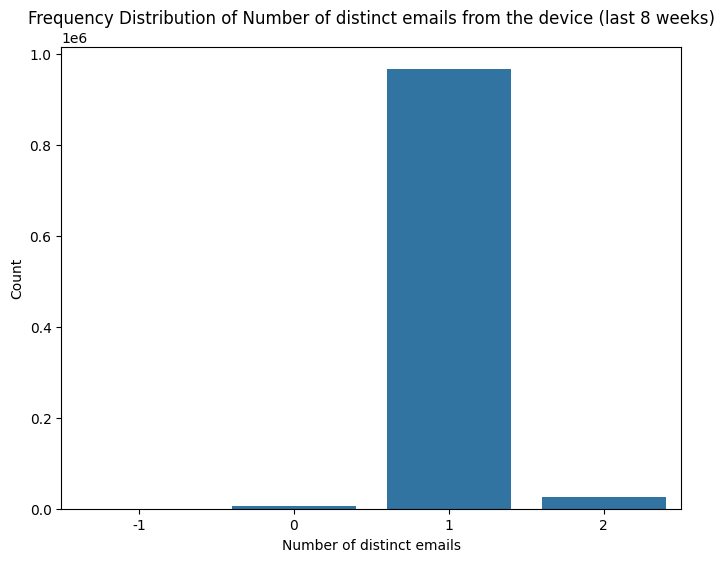

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='device_distinct_emails_8w')
plt.title("Frequency Distribution of Number of distinct emails from the device (last 8 weeks)")
plt.xlabel("Number of distinct emails")
plt.ylabel("Count")
plt.show()

## device_fraud_count

In [ ]:
# Number of fraudulent applications with used device. Ranges between [0, 1].
df['device_fraud_count'].value_counts()

,count
device_fraud_count,
0,1000000


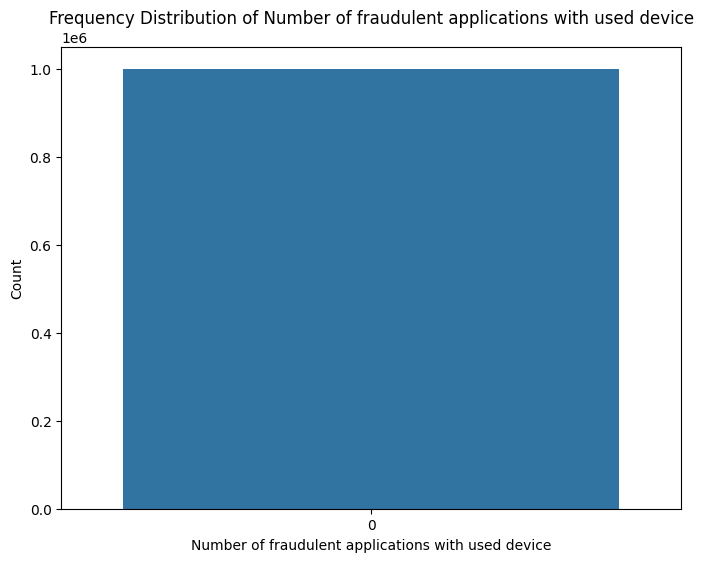

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='device_fraud_count')
plt.title("Frequency Distribution of Number of fraudulent applications with used device")
plt.xlabel("Number of fraudulent applications with used device")
plt.ylabel("Count")
plt.show()

## month

In [ ]:
# Month where the application was made. Ranges between [0, 7].
df['month'].value_counts()

,count
month,
3,150936
2,136979
0,132440
4,127691
1,127620
5,119323
6,108168
7,96843


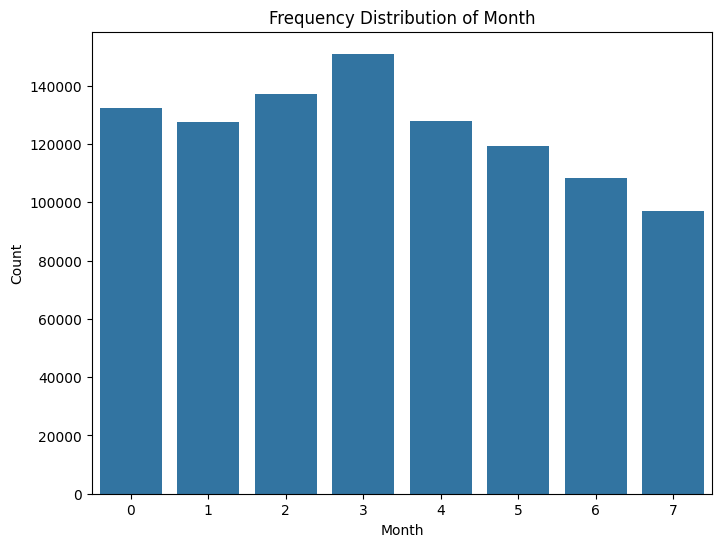

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='month')
plt.title("Frequency Distribution of Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

# Bivariate Analysis

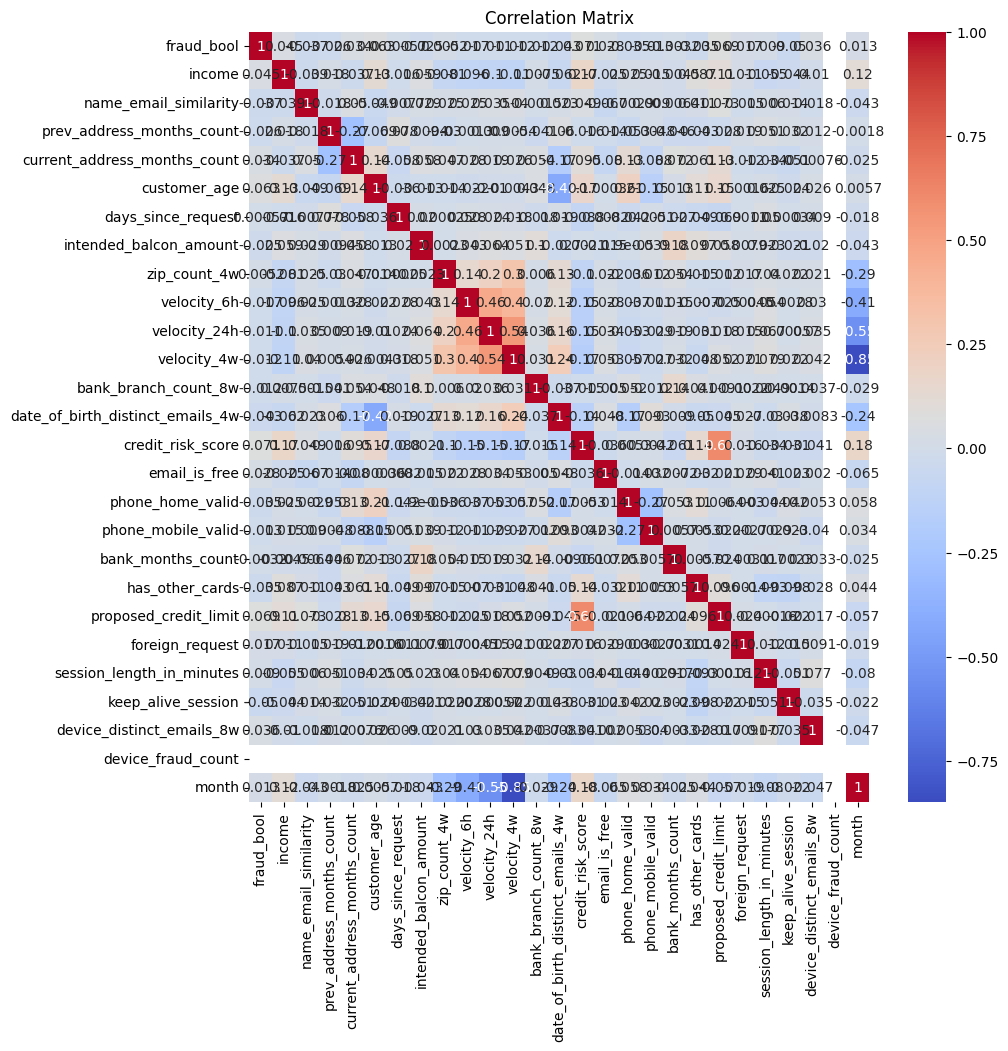

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

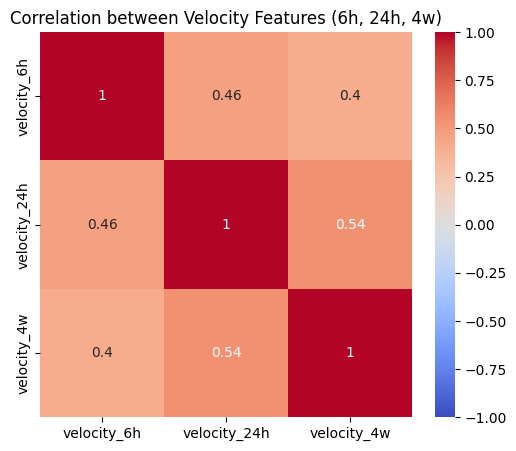

In [ ]:
cols = ['velocity_6h', 'velocity_24h', 'velocity_4w']
corr_subset = df[cols].corr(numeric_only=True)

plt.figure(figsize=(6, 5))
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Velocity Features (6h, 24h, 4w)')
plt.show()

In [ ]:
cat_variables = ['customer_age', 'payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
def entropy(x):
    _, counts = np.unique(x, return_counts=True)
    probabilities = counts / len(x)
    return -np.sum(probabilities * np.log2(probabilities))


def conditional_entropy(x, y):
    y_values, y_counts = np.unique(y, return_counts=True)
    y_probabilities = y_counts / len(y)

    conditional_entropies = []
    for y_val, y_prob in zip(y_values, y_probabilities):
        x_given_y = x[y == y_val]
        conditional_entropies.append(entropy(x_given_y))

    return np.sum(y_probabilities * conditional_entropies)

# Compute Entropy
entropies = pd.DataFrame([(x, entropy(df[x])) for x in cat_variables], columns=['cat1', 'H(cat1)'])

# Compute Conditional Entropy
results = []
for cat1 in cat_variables:
    for cat2 in cat_variables:
        if cat1 != cat2:
            results.append((cat1, cat2, conditional_entropy(df[cat1], df[cat2])))

conditional_entropy_df = pd.DataFrame(results, columns=['cat1', 'cat2', 'H(cat1|cat2)'])

information_gain = entropies.merge(conditional_entropy_df)
information_gain['information gain'] = information_gain['H(cat1)'] - information_gain['H(cat1|cat2)']

information_gain.head()

,cat1,H(cat1),cat2,H(cat1|cat2),information gain
0,customer_age,2.259009,payment_type,2.252592,0.006417
1,customer_age,2.259009,employment_status,2.182858,0.076151
2,customer_age,2.259009,housing_status,2.131017,0.127992
3,customer_age,2.259009,source,2.258443,0.000566
4,customer_age,2.259009,device_os,2.240893,0.018116


In [ ]:
information_gain.pivot_table(values='information gain', index='cat1', columns='cat2', aggfunc=np.sum)

/tmp/ipython-input-3014882461.py:1: FutureWarning: The provided callable <function sum at 0x7e9354b73100> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  information_gain.pivot_table(values='information gain', index='cat1', columns='cat2', aggfunc=np.sum)


cat2,customer_age,device_os,employment_status,housing_status,payment_type,source
cat1,,,,,,
customer_age,NaN,0.018116,0.076151,0.127992,0.006417,0.000566
device_os,0.018116,NaN,0.009960,0.016851,0.011223,0.003954
employment_status,0.076151,0.009960,NaN,0.047989,0.009345,0.000772
housing_status,0.127992,0.016851,0.047989,NaN,0.028847,0.000422
payment_type,0.006417,0.011223,0.009345,0.028847,NaN,0.002364
source,0.000566,0.003954,0.000772,0.000422,0.002364,NaN


/tmp/ipython-input-3196855480.py:3: FutureWarning: The provided callable <function sum at 0x7e9354b73100> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hm = sns.heatmap(round(information_gain.pivot_table(index='cat1', columns='cat2', values='information gain', aggfunc=np.sum),2),


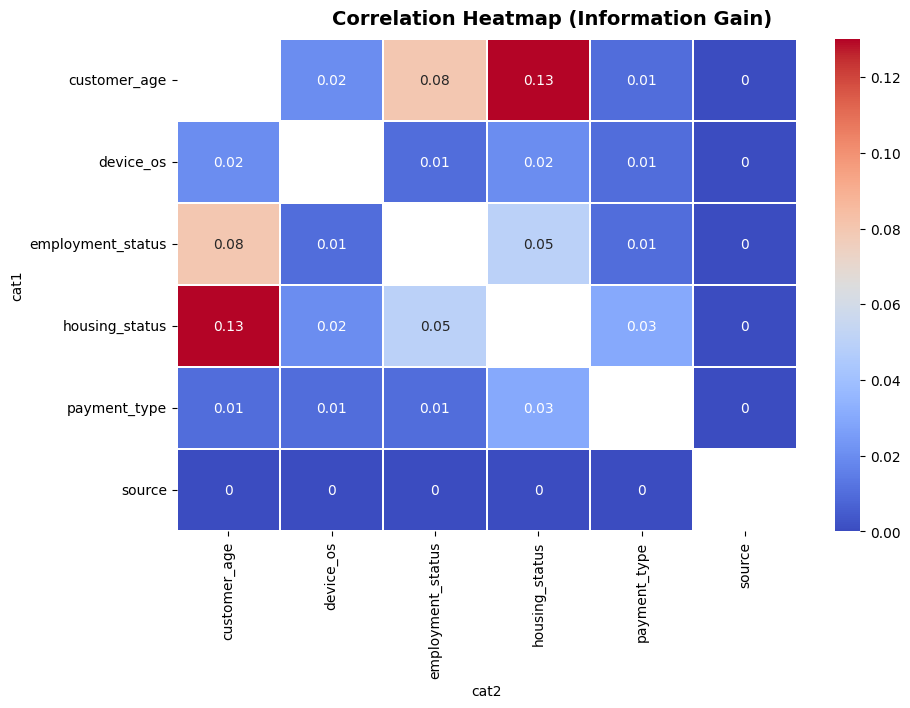

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

hm = sns.heatmap(round(information_gain.pivot_table(index='cat1', columns='cat2', values='information gain', aggfunc=np.sum),2),
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True,
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)

t = fig.suptitle('Correlation Heatmap (Information Gain)', fontsize=14, fontweight='bold')